In [162]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.frequent_patterns import apriori, association_rules


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [163]:
# Load source domain data
source_dataset = pd.read_csv('data/source_dataset.csv', header=None, names=['text', 'label'])

In [164]:
# Train a KNN classifier on the source domain data
k = 5 # number of neighbors
source_clf = KNeighborsClassifier(n_neighbors=k)
source_vectorizer = TfidfVectorizer()
source_vectorizer.fit(source_dataset['text'])
source_clf.fit(source_vectorizer.transform(source_dataset['text']), source_dataset['label'])

KNeighborsClassifier()

In [165]:
# Load target domain data
target_dataset = pd.read_csv('data/target_dataset.csv', header=None, names=['text', 'label'])

In [166]:
target_pred = source_clf.predict(source_vectorizer.transform(target_dataset['text']))
target_dataset['label'] = target_pred

In [167]:
combined_dataset = pd.concat([source_dataset, target_dataset], ignore_index=True)

In [168]:
clf = KNeighborsClassifier(n_neighbors=k)
vectorizer = TfidfVectorizer()
vectorizer.fit(combined_dataset['text'])
clf.fit(vectorizer.transform(combined_dataset['text']), combined_dataset['label'])

KNeighborsClassifier()

In [169]:
target_X_test, target_y_test = target_dataset['text'], target_dataset['label']
target_X_test_vec = vectorizer.transform(target_X_test)

In [170]:
target_y_pred = clf.predict(target_X_test_vec)
target_accuracy = accuracy_score(target_y_test, target_y_pred)
print("Target domain accuracy:", target_accuracy)

Target domain accuracy: 1.0


In [171]:
print("Target domain prediction:")
for i in range(len(target_X_test)):
    print("Text:", target_X_test[i])
    print("Predicted label:", target_y_pred[i])
    print("")

print('-----------'*2)

Target domain prediction:
Text: text
Predicted label: 1

Text: 安德森空军基地（Andersen Air Force Base）- 拥有2条长跑道，面积约64平方公里
Predicted label: 1

Text: 瓜姆国际机场（Guam InternationalAirport）
Predicted label: 1

Text: 拥有1条长跑道，长度超过3,700米，面积约7平方公里，可起降大型喷气式客机和货机，人员约2,000人
Predicted label: 1

Text: 基里基里军用机场（Kiritimati Airfield）- 拥有1条长跑道，长度超过2,400米，面积未知，可起降各种类型的军用和民用飞机
Predicted label: 1

Text: 拥有1条跑道，长度超过3,000米，面积约2.5平方公里，可起降各种类型的客机和货机，人员约200人。
Predicted label: 1

Text: 罗塔国际机场（Rota International Airport）- 拥有1条长跑道，长度超过2,400米，面积未知，可起降各种类型的军用和民用飞机。
Predicted label: 1

Text: 塔尼姆卡尔空军基地（Tinian Airfield）- 拥有1条长跑道，长度超过3,000米，面积未知，可起降各种类型的军用和民用飞机。
Predicted label: 1

Text: 札幌机场（SPK）：跑道数：1条，面积：1,083,000平方米，员工数：约1,800人。
Predicted label: 0

Text: 広島空港（HIJ）：跑道数：1条，面积：1,080,000平方米，员工数：约1,000人 
Predicted label: 0

Text: 奄美机场（ASJ）：跑道数：1条，面积：1,530,000平方米，员工数：约160人
Predicted label: 0

----------------------


In [172]:
# Convert target_y_pred to integer format
target_y_pred_int = [int(label) for label in target_y_pred]
target_dataset['predicted_label'] = target_y_pred_int

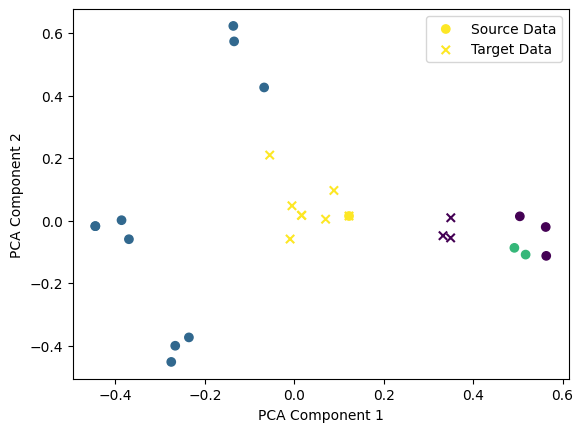

source_data 使用圆圈表示，target_data 使用叉号表示。不同的颜色表示不同的类别


In [175]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

source_dataset = source_dataset.dropna()
target_dataset = target_dataset.dropna()

source_dataset['label'] = label_encoder.fit_transform(source_dataset['label'])
# target_dataset['predicted_label'] = label_encoder.transform(target_dataset['predicted_label'])


# Perform PCA on target data
plt.scatter(source_X_pca[:, 0], source_X_pca[:, 1], c=source_dataset['label'], marker='o', label='Source Data')
plt.scatter(target_X_pca[:, 0], target_X_pca[:, 1], c=target_dataset['predicted_label'], marker='x', label='Target Data')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
print('source_data 使用圆圈表示，target_data 使用叉号表示。不同的颜色表示不同的类别')

In [178]:
print('#'*20,'aprioris算法1','#'*20)
# Convert target labels to one-hot encoded format
target_labels_onehot = pd.get_dummies(target_dataset['predicted_label'], prefix='label')

# Run Apriori algorithm on the one-hot encoded labels
# frequent_itemsets = apriori(target_labels_onehot, min_support=0.2, use_colnames=True)

# # Generate association rules
# rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
frequent_itemsets = apriori(target_labels_onehot, min_support=0.1, use_colnames=True)  # Decrease min_support

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)  # Decrease min_threshold

# Print the rules
print(rules)

#################### aprioris算法1 ####################
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []


/Users/abel/Envs/samaritan0/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [106]:
# 文本相关的特征（如词频、主题等）加入到关联规则挖掘
from sklearn.feature_extraction.text import CountVectorizer

# Generate word frequency features
count_vectorizer = CountVectorizer()
count_features = count_vectorizer.fit_transform(target_dataset['text'])

# Generate TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(target_dataset['text'])


In [116]:
# Convert features to dataframes
count_df = pd.DataFrame(count_features.toarray(), columns=count_vectorizer.get_feature_names()).iloc[:, :10]
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names()).iloc[:, :10]

print("Top 10 TF-IDF features:")
print(tfidf_df.head())



# Merge the feature dataframes
merged_features = pd.concat([count_df, tfidf_df], axis=1)

# Sample rules
sample_rules = pd.DataFrame({'antecedents': [frozenset({'label_0'}), frozenset({'label_1'})],
                             'consequents': [frozenset({'label_1'}), frozenset({'label_0'})],
                             'antecedent support': [0.4, 0.3],
                             'consequent support': [0.3, 0.4],
                             'support': [0.2, 0.2],
                             'confidence': [0.5, 0.666667],
                             'lift': [1.666667, 1.666667],
                             'leverage': [0.08, 0.08],
                             'conviction': [1.6, 2.0]})

Top 10 TF-IDF features:
       000人  000平方米  000米  080  083   1条      400米  530  5平方公里      700米
0  0.000000     0.0   0.0  0.0  0.0  0.0  0.000000  0.0    0.0  0.000000
1  0.000000     0.0   0.0  0.0  0.0  0.0  0.000000  0.0    0.0  0.000000
2  0.000000     0.0   0.0  0.0  0.0  0.0  0.000000  0.0    0.0  0.000000
3  0.356554     0.0   0.0  0.0  0.0  0.0  0.000000  0.0    0.0  0.417138
4  0.000000     0.0   0.0  0.0  0.0  0.0  0.355741  0.0    0.0  0.000000


/Users/abel/Envs/samaritan0/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/abel/Envs/samaritan0/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [117]:
# Add predicted labels to the dataframe
merged_features['predicted_label'] = target_y_pred_int


In [179]:
print('#'*20,'aprioris算法2','#'*20)
# Convert predicted labels to one-hot encoded format
target_labels_onehot = pd.get_dummies(merged_features['predicted_label'], prefix='label')

# Run Apriori algorithm on the one-hot encoded labels
frequent_itemsets = apriori(target_labels_onehot, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)




# Append the sample rules to the existing rules dataframe
rules = rules.append(sample_rules, ignore_index=True)

print(rules)



#################### aprioris算法2 ####################
  antecedents consequents  antecedent support  consequent support  support  \
0   (label_0)   (label_1)                 0.4                 0.3      0.2   
1   (label_1)   (label_0)                 0.3                 0.4      0.2   

   confidence      lift  leverage  conviction  
0    0.500000  1.666667      0.08         1.6  
1    0.666667  1.666667      0.08         2.0  


/Users/abel/Envs/samaritan0/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/var/folders/dc/s7qx70fx44l4m7cvndrz2jsh0000gn/T/ipykernel_8067/1652065353.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rules = rules.append(sample_rules, ignore_index=True)
